## **Modern Control Paradigms:**
### **Lecture 3: Introduction to Optimal Control: Linear Quadratic Regulator**

### **Basics of System Analysis and Control Design**

ANALYSIS

* PROPERTIES OF ODE
* SOLUTIONS OF LTI ODE
* STABILITY
* LInearization 

LINEAR CONTROL DESIGN
* POLE PLACEMENT
  * continues and descrete
  * How to tune?
  * NOTE CONTROLABILITY AND STABILIZABILITY
EXAMPLE CART POLE

Linear control over nonlinear systems:
* Nonlinear closed loop response
* The global stability Lyapunov theory
* ROA via SAMPLING

Questions:
* How to tune?
* How to find appropriate Lyapunov function for ROA
* Can we have optimal response?



WHY DO WE NEED TO ANALYZE THE NONLINEAR SYSTEM

**How to make the given dynamical system display desired behavior?** this is one of the questions of concern in the field of **control** theory. One of the most widely used approaches supporting the solution of the problems above is the so-called **feedback control**

<p align="center">
    <img src="https://drive.google.com/uc?id=1E4tNt0rSwXsrGSi4U1cOk0D_Y-q8bFJ-"" alt="drawing" width="70%" style="margin:auto"/>
</p>

Let us now assume that one have designed feedback law as follows:
$$
\mathbf{u} = \boldsymbol{\varphi}(\mathbf{x})
$$


### **System Analysis and Solutions of DE**
As we have discussed there are several important differences between linear and nonlinear systems, 
such as number of equilibria, superposition response on harmonic signals etc.

REWRITE INTRO

However, the most fundamental and notable property is that **nonlinear systems in general does not admit closed form analytical solution** as a consequence it is desirable be able to make some **predictions** about behavior of nonlinear system **without actually solving associated ODE** but studying the **qualitative behavior** such as:
* Existence and continuity of solutions
* Solving for equilibrium states 
* Checking for existence of periodic trajectories, orbits, limit cycles
* Tendency to remain in certain region of state space, convergence, stability 



There are different tools that facilitate this analysis.

### **Equilibriums**

One of the most natural questions ask while studying dynamical systems: Is there any special points or regions such that if system start there will remain there forever? Such regions are called invariant, and in most simple case their represented by so called singular or **equilibrium** points.

It is particular easy to find equilibriums by looking for such $\mathbf{x}_e$ that makes $\dot{\mathbf{x}}$ vanish, basicly one should just solve for roots of:
\begin{equation*}
\mathbf{f}(\mathbf{x}_e) = \mathbf{0}
\end{equation*}




Note that for linear systems one have the following:
\begin{equation*}
\mathbf{A}\mathbf{x}_e = \mathbf{0}
\end{equation*}
thus equilibriums are either trivial solution $\mathbf{x}_e = \mathbf{0}$ or nullspace $\text{Null}\{\mathbf{A}\}$ 




One may always transform the original dynamics to the new variables $\tilde{\mathbf{x}} = \mathbf{x} - \mathbf{x}_e$ such that:
\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{}\mathbf{f}(\tilde{\mathbf{x}}+\mathbf{x}_e)
\end{equation*}
we call the expression above **error** or **perturbation** dynamics

In [3]:
from sympy import symbols, solve, sin

x = symbols(r'x')
solve(-x + x**3, x)

ModuleNotFoundError: No module named 'sympy'

In [ ]:
def f(x):
    return x[1], -x[1] - 3*x[0]-x[0]**2

x = symbols(r'x_1, x_2')

solve(f(x), x)

[(-3, 0), (0, 0)]

In [2]:
jacobian = f_sym.jacobian(x)
jacobian

NameError: name 'f_sym' is not defined

### **Concepts of Stability**

Once the equlibrium or nominal motion is given, the natural question to ask is that how system will behave nearby.
This question is directly related to so called **stability**

Various types of stability may be discussed for the solutions of differential equations or difference equations describing dynamical systems. The one practically important type is that concerning the stability of solutions near a point of equilibrium. This may be analyzed by the theory of **Aleksandr Lyapunov**. 

In simple terms, if the solutions that start out near an equilibrium point $\mathbf{x}_{e}$ stay near $\mathbf{x}_{e}$ forever, then $\mathbf{x}_{e}$ is Lyapunov stable. More strongly, if $\mathbf{x}_{0}$ is Lyapunov stable and all solutions that start out near $\mathbf{x}_{e}$ converge to $\mathbf{x}_e$, then $\mathbf{x}_{e}$ is asymptotically stable. 




A strict definitions are as follows:

Equilibrium $\mathbf{x}_e$ is said to be:
*   **Lyapunov stable** if:
\begin{equation*}
\forall \epsilon>0,\exists\delta>0, \|\mathbf{x}(0) - \mathbf{x}_e\|<\delta \rightarrow \|\mathbf{x}(t) - \mathbf{x}_e\|<\epsilon, \quad \forall t
\end{equation*}
*   **Asymptotically stable** if it is Lyapunov stable and:
\begin{equation*}
\exists \delta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow \lim_{t\to\infty} \|\mathbf{x}(t) - \mathbf{x}_e\| = 0, \quad \forall t
\end{equation*}
*   **Exponentially stable** if it is asymptotically stable and:
\begin{equation*}
\exists \delta, \alpha, \beta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow  \|\mathbf{x}(t) - \mathbf{x}_e\| \leq\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}, \quad \forall t  
\end{equation*}

Conceptually, the meanings of the above terms are the following:

*   **Lyapunov stability** of an equilibrium means that solutions starting "close enough" to the equilibrium (within a distance $\delta$  from it) remain "close enough" forever
*   **Asymptotic stability** means that solutions that start close enough not only remain close enough but also eventually converge to the equilibrium.
*  **Exponential** stability means that solutions not only converge, but in fact converge faster than or at least as fast as a particular known rate $\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}$


### **Stability of LTI systems**

Let us start with stability of LTI systems:
$$
\mathbf{\dot{x}} (t)=\mathbf{A}\mathbf{x}(t)
$$
An integral above can be calculated analytically:
$$
\mathbf{x}^*(t)=e^{\mathbf{A}t}\mathbf{x}(0)
$$
where matrix exponential is defined via power series:
$$
 e^{\mathbf{A}t}=\sum _{k=0}^{\infty }{1 \over k!}\mathbf{A}^{k}t^k
$$



A natural questions to ask:
*   How to calculate this matrix exponential without power series?
*   Do we need Can we analyze the behaviour of solutions without explicitly solving ODE?




Let us first consider the first question, assume for a while that we can do the following factorization:
$$
\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}  
$$

Thus defining new variables $\mathbf{z} = \mathbf{Q}^{-1}\mathbf{x}$ yields:
$$
\dot{\mathbf{z}} = \mathbf{\Lambda}\mathbf{z}
$$
Which is in fact just a system of decoupled equations:
$$
\dot{z}_i = \lambda_i z_i,\quad i = 1,2\dots,n
$$
with known solutions:
$$
z^*_i = e^{\lambda_i t} z_i(0)
$$

Recalling that $\lambda_i$ is nothing but eigenvalues of matrix $\mathbf{A}$, thus one may discuss behavior of solution without explicitly calculating them, just by linear analysis on $\mathbf{A}$! 





The solution $z_i =  e^{\lambda_i t}z_i(0)$ can be decomposed using Euler's identity:
$$
    z_i =  e^{\lambda_i t}z_i(0) =
    e^{(\alpha_i + i \beta_i) t}z_i(0) =
    e^{\alpha_i t} 
          e^{i \beta_i t}z_i(0) = 
    e^{\alpha_i t} 
    (\cos(\beta_i t) + i \sin(\beta_i t))z_i(0)
$$
where $\lambda_i = \alpha_i + i \beta_i, \operatorname{Re}{\lambda_i} = \alpha_i, \operatorname{Im}{\lambda_i} = \beta_i$



Since $\| (\cos(\beta_i t) + i \sin(\beta_i t))\| =1$ thus, norm of $z_i$:

---
* Bounded if $\operatorname{Re}{\lambda_i} = \alpha_i \leq 0, \forall i$,, hence the system is **Lyapunov stable**. 
* Decreasing if $\operatorname{Re}{\lambda_i} = \alpha_i < 0, \forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, \operatorname{Re}{\lambda_i} = \alpha_i > 0$, hence the system is **unstable**. 
---

The very similar analysis may be performed in case of **discrete dynamics** in form:
$$
\mathbf{x}_{k+1}=\mathbf{A}\mathbf{x}_k
$$

And the stability criterion will be as follows:

---
* Bounded if $ |\lambda_i|\leq 1,\forall i$, hence the system is **Lyapunov stable**. 
* Decreasing if $|\lambda_i| < 1,\forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, |\lambda_i|>1 $, hence the system is **unstable**. 
---

### Linear Control 

### **Local Behavior and Linearization**

As one note for LTI systems stability is completely determined by the eigenvalues of $\mathbf{A}$, 
however in the nonlinear case there are no notion of eigenvalues, a one of the most straightforward ideas 
is to approximate the nonlinear system in the vicente of equilibrium point using the first term of Taylor series:
 
$$
\dot{\mathbf{x}}
= \mathbf{f}(\mathbf{x}_e)+ 
\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e} 
(\mathbf{x} - \mathbf{x}_e)
$$



Introducing the error $\tilde{\mathbf{x}}$ we may rewrite the equation above in linear form as follows:

\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{A}\tilde{\mathbf{x}}
\end{equation*}
where: $\mathbf{A} = \frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e}$ 



---

Thus linearization consist of three steps:
1.   Solving $\mathbf{f}(\mathbf{x}_e) = \mathbf{0}$ for equilibriums.
2.   Calculation of the system Jacobian with respect to state $\mathbf{x}$
3.   Evaluation of the resulting Jacobian in the equilibrium points $\mathbf{x}_e$

---

Let us demonstrate the application of Lyapunov this method on following systems:
\begin{equation*}
\ddot{x} = \dot{x} + 3 x + x^2
\end{equation*}

However there are several issues with this approach, which we will demonstrate by the following examples.

We begin with simple system:

\begin{equation*}
    \dot{x} = -x^3 
\end{equation*}

It is obvious that this system has equlibrium $x=0$ and linearization nearby this equlibrium is Lyapunov stable, however as one can ensure either graphically or just by simulation, this system is stable: 

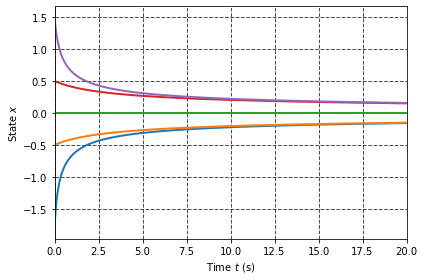

In [ ]:
def f(x,t):
    return -x**3

x_sol = simulate(f, [-1.8, -0.5, 0, 0.5, 1.5], tf=20, show_plot=True)

Consider now the familiar system:

$$
\dot{x} = -x + x^3 
$$

If one would check the stability of equlibrium $x=0$ the resulting linearizate system will be strictly stable.

Let us simulate the response from different initial conditions:

In [ ]:
from sympy import Matrix

def f(x, t):
    return x[1], -x[1] - 3*x[0]-x[0]**2


x = symbols(r'x_1, x_2')
f_sym = Matrix([f(x, 0)]).T
f_sym

Matrix([
[                  x_2],
[-x_1**2 - 3*x_1 - x_2]])

In [ ]:
equlibriums = solve(f_sym, x)
print(equlibriums)

[(-3, 0), (0, 0)]


In [ ]:
from sympy.utilities.lambdify import lambdify
from numpy import array
from numpy.linalg import eig

jacobian_num = lambdify([x], jacobian)

for equlibrium in equlibriums:
    x_e = array(equlibrium, dtype='double')
    A = array(jacobian_num(x_e), dtype='double')
    lambdas, Q = eig(A) 
    print(f'The matrix A for equlibrium {x_e} is: \n {A} \n Eigen values:\n {lambdas} \n')

The matrix A for equlibrium [-3.  0.] is: 
 [[ 0.  1.]
 [ 3. -1.]] 
 Eigen values:
 [ 1.30277564 -2.30277564] 

The matrix A for equlibrium [0. 0.] is: 
 [[ 0.  1.]
 [-3. -1.]] 
 Eigen values:
 [-0.5+1.6583124j -0.5-1.6583124j] 



### **Stibility via Lyapunov Linearization Method**

The procedure above is known as Lyapunov linearization method and can be used to find the local stability properties of nonlinear systems 
nearby equlibrium by studying their linear aproximations as follows:

* If the linearized system is **strictly stable** (i.e, $\operatorname{Re}{\lambda_i} = \alpha_i = 0, \forall i$), then the equilibrium point is **asymptotically stable** (for the **actual nonlinear** system).
* If the linearized system is **unstable** ($\exists i, \operatorname{Re}{\lambda_i} = \alpha_i > 0$), then the equilibrium point is **unstable**
(for the **nonlinear system**).
* If the linearized system is **marginally stable** ($\operatorname{Re}{\lambda_i} = \alpha_i \leq 0, \forall i$), then
one **can't conclude anything** from the linear approximation (the equilibrium
point may be stable, asymptotically stable, or unstable for the nonlinear system).


### **Nominal Motion and Linearization Around Trajectory**
In some practical problems, we are not concerned with stability around an equilibrium
point, but rather with the stability of a motion, i.e, whether a system will remain close
to its original motion trajectory if slightly perturbed away from it. 

Let $\mathbf{x}_d(t)$ be the solution of equation $\dot{\mathbf{x}}_d = \mathbf{f}(\mathbf{x}_d)$, i.e., the nominal motion trajectory,
corresponding to initial condition $\mathbf{x}_d(0) = \mathbf{x}_0$. 

Let us now perturb the initial condition to be $\mathbf{x}_d(0) = \mathbf{x}_0 + \delta\mathbf{x}_0$ and study the associated variation of the motion:
\begin{equation*}
\tilde{\mathbf{x}}(t) = \mathbf{x}(t) - \mathbf{x}_d(t)
\end{equation*}


Since both $\mathbf{x}_d(t)$ and $\mathbf{x}(t)$ are solutions, we have the following:
\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{f}(\mathbf{x}_d(t)+\tilde{\mathbf{x}}) - \mathbf{f}(\mathbf{x}_d(t)) = \mathbf{g}(\tilde{\mathbf{x}}, t)
\end{equation*}
with initial condition $\tilde{\mathbf{x}}_0 = \delta\mathbf{x}_0$

Note, that the perturbation dynamics is non-autonomous (TV), due to the presence of the nominal trajectory $\mathbf{x}_d(t)$ on the right-hand side. 
Thus the linearization will be time variant

HOW TO DEAL WITH NONLINEAR SYSTEMS?

### **Local stability and Linearization**

In the previous class we have studied the stability nearby equlibrium $\mathbf{x}_0$ of nonlinear systems in form:

\begin{equation*}
\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}),\quad \mathbf{x} \in \mathbb{R}^n
\end{equation*}

Which we approximate by the linear system:

$$
 \dot{\tilde{\mathbf{x}}} =\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e} \tilde{\mathbf{x}} = \mathbf{A}\tilde{\mathbf{x}}
$$

Then we conclude the stability of the original nonlinear system by inspecting eigenvalues of $\mathbf{A}$

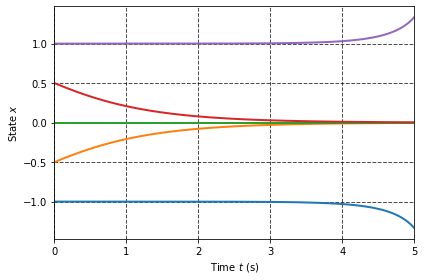

In [ ]:
def f(x,t):
    return -x+x**3

x_sol = simulate(f, [-1.00001, -0.5, 0, 0.5, 1.00001], tf=5, show_plot=True)

### **Local and Global Stability**
If stability is holds just for some set $\mathcal{R}$ of states, we call such stability to be **local** and region $\mathcal{R}$ is **domain of attraction**.   

If asymptotic (or exponential) stability holds for **any initial states**, the equilibrium point is said to be asymptotically (or exponentially) stable in the large. It is also called **globally** asymptotically (or exponentially) stable. 

## **Lyapunov's Direct Method**

The basic philosophy of Lyapunov's direct method is the mathematical extension of a
fundamental physical observation: if the total energy of a mechanical (or electrical)
system is continuously dissipated, then the system, whether linear or nonlinear, must
eventually settle down to an equilibrium point. Thus, we may conclude the stability of
a system by examining the variation of a single scalar function.



Specifically, let us consider the nonlinear mass-damper-spring system:

\begin{equation*}
    m\ddot{y}+b|\dot{y}|\dot{y} +k_0 y + k_1 y^3 = 0
\end{equation*}

Assume that the mass is pulled away from the
natural length of the spring by a large distance, and then released. 
Will the resulting motion be stable? A physical intuition said that it should be.



Let us draw the phase portrait:

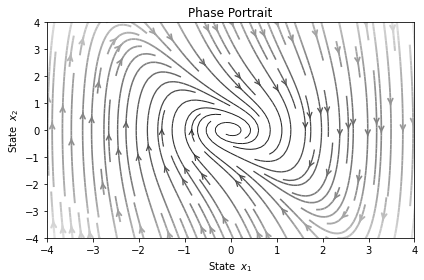

In [ ]:
m, b, k0, k1 = 1, 1, 1, 1 
def f(x,t):
    y = x[0]
    dy = x[1]
    ddy = -(b*abs(dy)*dy + k0*y + k1*y**3)/m
    return dy, ddy
phase_portrait(f, x_range=[4, 4], density=1.5) 

However if one will find the Jacobian:

In [ ]:
from sympy import Matrix, symbols, solve
from sympy.utilities.lambdify import lambdify

x = symbols(r'y \dot{y}', real = True)
f_sym = Matrix([f(x, 0)]).T

equlibriums = solve(f_sym, x)
print(f'Equilibria are:\n{equlibriums}\n')
jacobian = f_sym.jacobian(x)
print(f'Jacobian is:')
jacobian


Equilibria are:
[(0, 0)]

Jacobian is:


Matrix([
[          0,                                     1],
[-3*y**2 - 1, -\dot{y}*sign(\dot{y}) - Abs(\dot{y})]])

In [ ]:
from numpy import array, real
from numpy.linalg import eig

jacobian_num = lambdify([x], jacobian)
for equlibrium in equlibriums:
    x_e = array(equlibrium, dtype='double')
    A = array(jacobian_num(x_e), dtype='double')
    print(f'The real part of poles for equlibrium {x_e} are: \n {real(eig(A)[0])} ')

The real part of poles for equlibrium [0. 0.] are: 
 [ 0. -0.] 



Evaluation of the Jacobian around trivial equilibrium yields marginal stability of linearized system, thus we can't say anything on nonlinear system.  

### **Energy as Stability Criterion**
Let us consider the mechanical energy of the system above:
\begin{equation*}
    V(y, \dot{y}) = 
    \frac{1}{2}m\dot{y}^2 + \int_0^y(k_0 y + k_1 y^3)dy = 
    \frac{1}{2}m\dot{y}^2 + \frac{1}{2}k_0 y^2 + \frac{1}{4}k_1 y^4 
\end{equation*}
Comparing the definitions of stability and mechanical energy, one can easily see some
relations between the mechanical energy and the stability concepts described earlier:

* zero energy corresponds to the equilibrium point ($y = 0, \dot{y}=0$)
* asymptotic stability implies the convergence of mechanical energy to zero
* instability is related to the growth of mechanical energy

These relations indicate that the **value of a scalar quantity**, the mechanical energy,
**indirectly reflects the magnitude of the state vector**.

The rate of energy during the system's motion is obtained easily by
differentiating:
\begin{equation*}
    \dot{V}(y, \dot{y}) = m \dot{y}\ddot{y} + (k_0 y + k_1 y^3)\dot{y} = -b | \dot{y}|^3
\end{equation*}
this implies the energy of the system, starting from some initial value,
is continuously dissipated by the damper until the mass settles down, i.e. $y = 0$.

Physically, it is easy to see that the mass must finally settle down at the natural length
of the spring, because it is subjected to a non-zero spring force at any position other
than the natural length.

The direct method of Lyapunov is based on a generalization of the concepts in
the above mass-spring-damper system to more complex systems. Faced with a set of
nonlinear differential equations, the basic procedure of **Lyapunov's direct method** is to
generate a **scalar "energy-like" function** for the dynamical system, and examine the time
variation of that scalar function. In this way, conclusions may be drawn on the
**stability of the set of differential equations without using the difficult stability
definitions or requiring explicit knowledge of solutions**

### **Positive Definite Functions**

To begin with we will admit the two notable properties of the energy function above: 
* Strictly positive unless both state variables $\mathbf{x}$ are zero. 
* Monotonically decreasing when the variables $\mathbf{x}$ vary along system trajectories

In Lyapunov's direct method, the first property is formalized by the notion of **positive definite functions** (PD), and the second is formalized by the so-called **Lyapunov functions**.

---
A scalar continuous function $V(\mathbf{x})$ is said to be ***locally positive definite*** (LPD) in ball $\mathcal{B}_R = \{\mathbf{x} : \| \mathbf{x}\|\leq R\}$ if:
* $V(0) = 0$
* $V(\mathbf{x})>0,\ \forall \mathbf{x} \neq \mathbf{0}$ 

If above property holds $\mathbf{x} \in \mathbb{R}^n$ then $V(\mathbf{x})$ is said to be ***globally positive definite*** (GPD)

---

The above definition implies that the function V has a unique minimum at the origin.

For instance:
* The $V(\mathbf{x}) = \frac{1}{2}x_2^2 + 1-\cos{x_1}$ is locally positive definite 
* While $V(\mathbf{x}) = \frac{1}{2}x_1^2 + \frac{1}{2}x_2^2$ is globally positive definite 


### **Negative and Semi-Definiteness**

A few related concepts can be defined similarly, in a local or global sense, i.e., a
function $V(\mathbf{x})$ is negative definite if — $V(\mathbf{x})$ is positive definite; $V(\mathbf{x})$ is positive
semi-definite if $V(\mathbf{0}) = 0$ and $V(\mathbf{x}) \geq 0$ for $\mathbf{x} \neq 0$ $V(\mathbf{x})$ is negative semi-definite if - $V(\mathbf{x})$ is positive semi-definite. 

The prefix "semi" is used to reflect the possibility of $V$ being equal to zero eventhough $\mathbf{x}$ is not.



### **Local Stability via Direct Method**


If, in a ball $\mathcal{B}_R$, there exists a scalar function $V(\mathbf{x})$
with continuous first partial derivatives such that:

* $V(\mathbf{x})$ is positive definite (locally in $\mathcal{B}_R$)
* $\dot{V}(\mathbf{x})$ is negative semi-definite (locally in $\mathcal{B}_R$)


then the equilibrium point $\mathbf{0}$ is **stable**. If, actually, the derivative $\dot{V}(\mathbf{x})$ is locally
negative definite in $\mathcal{B}_R$, then the ***stability is asymptotic***.


Let us study the stability of the nonlinear system:
\begin{equation*}
\begin{cases}
\dot{x}_1 = x_1(x^2_1+x^2_2 - 2) -4 x_1 x^2_2  \\ 
\dot{x}_2 = 4 x^2_1 x_2 + x_2(x^2_1+x^2_2 - 2)
\end{cases}
\end{equation*}

with following Lyapunov candidate:
\begin{equation*}
V(\mathbf{x}) = x_1^2 + x_2^2 
\end{equation*}


In [ ]:
from sympy import simplify
x = symbols('x_1, x_2')
V_symb = x[0]**2 + x[1]**2
print(f'Lyapunov candidate:')
V_symb

Lyapunov candidate:


x_1**2 + x_2**2

One may use a chain rule in order to find $\dot{V}$ as follows:
\begin{equation*}
\dot{V} =  \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\mathbf{\dot{x}}_i = \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\boldsymbol{f}_i = \nabla V \cdot \boldsymbol{f}
\end{equation*}

In [ ]:
grad_V = Matrix([V_symb]).jacobian(x)
print(f'Gradient of Lyapunov candidate:')
grad_V

Gradient of Lyapunov candidate:


Matrix([[2*x_1, 2*x_2]])

### **Nonlinear Systems**

### **Linearization**

An approach above may be used to analyze the stability of the nonlinear systems in form:

\begin{equation}
\mathbf{\dot{x}} (t)=\boldsymbol{f}\big(\mathbf{x}(t)\big) 
\end{equation}

To do so once may find the liniarized representation of the nonlinear system nearby equalibrium of interest as follows:

\begin{equation}
\mathbf{\dot{\tilde{x}}} (t) = \frac{\partial \boldsymbol{f}}{\partial \mathbf{x}}\mid_{\mathbf{x}_e} \tilde{x} =\mathcal{J}(\mathbf{x}_e)\tilde{x}=\mathbf{A}\tilde{x}
\end{equation}
where $\tilde{x}=  \mathbf{x}_e - \mathbf{x}(t)$ is the deviation from the equalibrium point.



#### **Example:**

Consider the following system:

\begin{equation}
\begin{cases}
\dot{x}_1 = x_1 - x_1^3 + 2 x_1 x_2\\
\dot{x}_2 = -x_2 + \frac{1}{2}x_1 x_2
\end{cases}
\end{equation}

Analyze the system stability in the following equalibrias:

\begin{equation}
x_{e_1} = 
\begin{bmatrix}
0 \\ 
0
\end{bmatrix},
\quad
x_{e_2} = 
\begin{bmatrix}
1 \\ 
0
\end{bmatrix},
\end{equation}

LINEARIZATION ALONG TRAJECTORY

In [ ]:
f_symb = Matrix([x[0]*(x[0]**2 + x[1]**2 - 2) - 4*x[0]*x[1]**2,
                 4*x[0]**2 *x[1] +x[1]*(x[0]**2 + x[1]**2 - 2),])

dV = simplify(grad_V*f_symb)
print(f'Time derivative of Lyapunov candidate:')
dV[0]


Time derivative of Lyapunov candidate:


2*x_1**4 + 4*x_1**2*x_2**2 - 4*x_1**2 + 2*x_2**4 - 4*x_2**2

The derivative above is locally N.D in the ball $\mathbf{x}^2_1 + \mathbf{x}^2_2 <2$

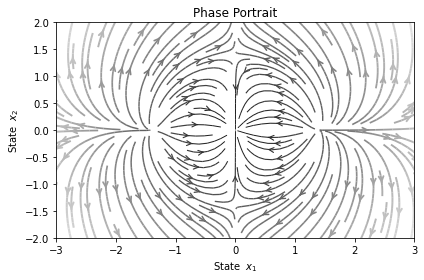

In [ ]:
# Create a numerical function from symbolic one
f_num = lambdify([x], f_symb)

def f(x, t):
    dx = f_num(x)[:,0]
    return dx

phase_portrait(f, x_range=[3, 2], density=1.5) 

### **Global Stability via Direct Method**


Assume that there exists a scalar function $V(\mathbf{x})$ with continuous first order derivatives such that:

* $V(\mathbf{x})$ is positive definite
* $\dot{V}(\mathbf{x})$ is negative definite
* $V(\mathbf{x})\rightarrow \infty$ as $\|\mathbf{x}\|\rightarrow \infty$

then the equilibrium at the origin is **globally asymptotically stable**





Consider the following system:
\begin{equation*}
\begin{cases}
\dot{x}_1 = -x_1 + x_2  \\ 
\dot{x}_2 = -x_1 - x_2^3
\end{cases}
\end{equation*}

with following Lyapunov candidate:
\begin{equation*}
V(\mathbf{x}) = x_1^2 + x_2^2 
\end{equation*}

In [ ]:
from sympy import simplify
x = symbols('x_1, x_2')
V_symb = x[0]**2 + x[1]**2
print(f'Lyapunov candidate:')
V_symb

Lyapunov candidate:


x_1**2 + x_2**2

In [ ]:
grad_V = Matrix([V_symb]).jacobian(x)
print(f'Gradient of Lyapunov candidate:')
grad_V

Gradient of Lyapunov candidate:


Matrix([[2*x_1, 2*x_2]])

In [ ]:
f_symb = Matrix([-x[0] + x[1],
                    -x[0] - x[1]**3])

dV = simplify(grad_V*f_symb) 
print(f'Time derivative of Lyapunov candidate:')
dV[0]

Time derivative of Lyapunov candidate:


-2*x_1**2 - 2*x_2**4

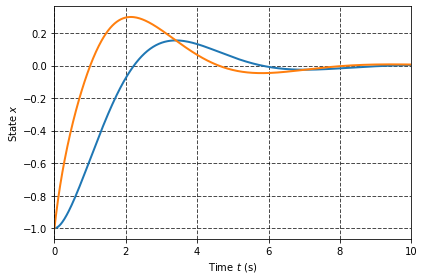

In [ ]:
# Create a numerical function from symbolic one
f_num = lambdify([x], f_symb)

def f(x, t):
    dx = f_num(x)[:,0]
    return dx

x_sol = simulate(f, [[-1,-1]], tf = 10, show_plot=True)

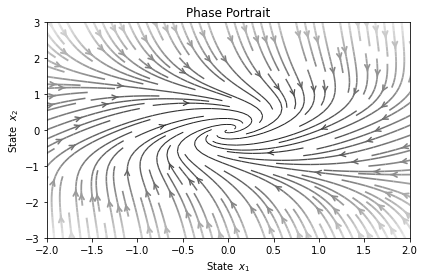

In [ ]:
phase_portrait(f, x_range=[2, 3], density=1.5) 

### **Geometrical Interpretation**
![title](images/lyap_func.jpg)

### **Lyapunov Functions for LTI systems**

The direct Lyapunov method can be in fact applied to linear systems as well: 
$$
    \dot{\mathbf{x}} = \mathbf{A}\mathbf{x}
$$

Consider the quadratic Lyapunov candidate:
$$
    V = \mathbf{x}^T\mathbf{P}\mathbf{x}
$$

with time derivative:
$$
    \dot{V} = \mathbf{x}^T(\mathbf{A}^T\mathbf{P} + \mathbf{A}\mathbf{P})\mathbf{x} = -\mathbf{x}^T \mathbf{Q} \mathbf{x}
$$

where $\mathbf{Q}$ is P.D. 

One can conclude that the LTI system is stable if there is P.D solution of matrix equation:
$$
    \mathbf{A}^T\mathbf{P} + \mathbf{A}\mathbf{P} = -\mathbf{Q}
$$


As example consider the linear system:

## **Lyapunov Direct Method**
In the Lyapunov Direct Method, we are trying to prove stability of an equilibrium for a given dynamical system ${\dot{\mathbf{x}}=\boldsymbol{f}(\mathbf{x})}$ by looking for  **candidate Lyapunov function** $V(\mathbf{x}):\mathbb{R}^{n}\rightarrow \mathbb{R} $ that satisfies the following conditions:



>*   $V(\mathbf{x})=0$ if and only if $\mathbf{x}=\mathbf{0}$
>*   $V(\mathbf{x})>0$ if and only if $\mathbf{x}\neq\mathbf{0}$
>*   $\dot{V}(\mathbf{x}) \leq 0$ if and only if $\mathbf{x}\neq\mathbf{0}$ 

This is known as the criteria of **asymptotic stability** of the equilibrium of ${\dot{\mathbf{x}}=\boldsymbol{f}(\mathbf{x})}$
 
In two dimensions $\mathbf{x}\in\mathbb{R}^2$ one can interpret the stability criteria above geometrically by thinking of a projection of system dynamics vector $\boldsymbol{f}$ onto the gradient of $V$. 


### **Example:**

Consider the following system:
\begin{equation}
\begin{cases}
\dot{x}_1 = -x_1 + x_2  \\ 
\dot{x}_2 = -x_1 - x_2^3
\end{cases}
\end{equation}

with following Lyapunov candidate:
\begin{equation}
V(\mathbf{x}) = x_1^2 + x_2^2 
\end{equation}

One may use a chain rule in order to find $\dot{V}$ as follows:
\begin{equation}
\dot{V} =  \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\mathbf{\dot{x}}_i = \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\boldsymbol{f}_i = \nabla V \cdot \boldsymbol{f}
\end{equation}
<!-- 
Analyze the system stability in the following equalibrias:

\begin{equation}
x_{e_1} = 
\begin{bmatrix}
0 \\ 
0
\end{bmatrix},
\quad
x_{e_2} = 
\begin{bmatrix}
1 \\ 
0
\end{bmatrix},
\end{equation} -->

### **Geometrical Interpretation**
![title](images/lyap_func.jpg)

### **Controller Design** 

**How to make the given dynamical system display desired behavior?** this is one of the questions of concern in the field of **control** theory. One of the most widely used approaches supporting the solution of the problems above is the so-called **feedback control**

<p align="center">
    <img src="https://drive.google.com/uc?id=1E4tNt0rSwXsrGSi4U1cOk0D_Y-q8bFJ-"" alt="drawing" width="70%" style="margin:auto"/>
</p>

Let us now assume that one have designed feedback law as follows:
$$
\mathbf{u} = \boldsymbol{\varphi}(\mathbf{x})
$$



## **Control Design**



## **Linear Quadratic Regulator**
The theory of optimal control is concerned with operating a dynamic system at minimum cost. The case where the system dynamics are described by a set of linear differential equations and the cost is described by a quadratic function is called the LQ problem.

Consider  LTI, dynamics is:
\begin{equation}
\dot {\mathbf{x}} = \mathbf{A}  \mathbf{x} + \mathbf{B} \mathbf{u}
\end{equation}

We looking for control $\mathbf{u}$ such that the following cost is minimized:
\begin{equation}
J_c = \int_0^\infty 
\big[
\mathbf  x^\top \mathbf{Q} \mathbf{x} +
\mathbf  u^\top \mathbf{R} \mathbf{u} 
\big]dt
\end{equation}




### **Time Invariant Case**

In order to get the solution of this problem one can use the several principles, such as HJB equation, dynamic programming, Pontryagin maxima principle, all in all the solution consist of two steps.

Solving the Riccati equation:
\begin{equation}
\mathbf{Q} - \mathbf{S} \mathbf{B} \mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S} 
 + \mathbf{S} \mathbf{A} + \mathbf{A}^\top \mathbf{S} = 0
\end{equation}

Control law is given by:

\begin{equation}
\mathbf  u = 
-\mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S} \mathbf{x}
\end{equation}

This is the desired control law. We can see that it is \emph{proportional}. We can re-write it as:
Or just 
\begin{equation}
\mathbf  u = -\mathbf K \mathbf{x}
\end{equation}
where $\mathbf K = \mathbf{R}^{-1} \mathbf{B}^\top \mathbf{S}$

### **Example:**

Consider an inverted pendulum is a pendulum that has its center of mass above its pivot point. It is unstable and without additional help will fall over. It can be suspended stably in this inverted position by using a control system to monitor the angle of the pole and move the pivot point horizontally back under the center of mass when it starts to fall over, keeping it balanced. 

You may see the videos [here](https://www.youtube.com/watch?v=xRSLq3WJBew) and [here](https://www.youtube.com/watch?v=XWhGjxdug0o)




[ 0.          0.          8.57758707 -8.57758707]
[[-13.97161874  -1.59928553  -0.31622777  -0.52023256]]


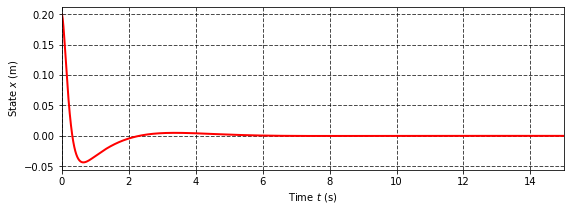

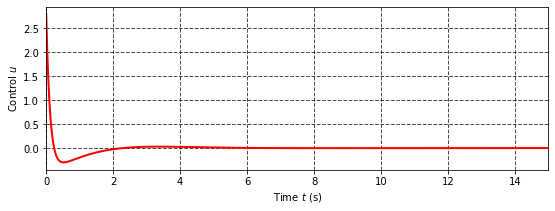

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are as are

def lqr(A, B, Q, R):
    # Solve the ARE
    S = are(A, B, Q, R)
    R_inv = np.linalg.inv(R)
    K = R_inv.dot((B.T).dot(S))
    Ac = A - B.dot(K)
    E = np.linalg.eigvals(Ac)
    return S, K, E


def system_ode(x, t, A, B, K):
    u = -np.dot(K,x)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx


t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
y_0 = 0.5
x0 = [0.2, 0, 0, 0] # Set initial state 


M, m, l, g = .4, .2, 0.2, 9.81

A = [[0, 1, 0, 0], 
     [g*(M+m)/(M*l), 0, 0, 0],
     [0,0,0,1],
     [-m*g/M, 0,0,0]]

A = np.array(A)

print(np.linalg.eigvals(A))

B = [[0], 
     [-1/(M*l)], 
     [0], 
     [1/M]]

B = np.array(B)

Q = np.diag([1,0.1,1,0.1])

R = np.diag([10])



S, K, E = lqr(A, B, Q, R)
print(K)
x_sol = odeint(system_ode, x0, t, args=(A, B, K )) # integrate system "sys_ode" from initial state $x0$
u_sol = - K.dot(x_sol.T).T
from matplotlib.pyplot import *
theta, dtheta, x, dx = x_sol[:, 0], x_sol[:, 1], x_sol[:, 2], x_sol[:, 3]


figure(figsize=(9, 3))
plot(t, theta, 'r', linewidth=2.0)
# plot(t, x, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$ (m)')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(9, 3))
plot(t, u_sol, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Control ${u}$')
xlabel(r'Time $t$ (s)')
show()


>**HW EXERCISE**: 
Try to simulate the linear feedback on the nonlinear system with state $\mathbf{x}=[\theta, \dot{\theta}, x, \dot{x}]^T$ and dynamics given by:
\begin{equation}
\begin{cases} 
\left(M+m\right){\ddot {x}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{x} \cos \theta  \\
\end{cases}
\end{equation}

### **LQR and Poles**

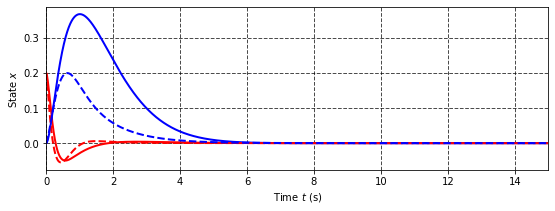

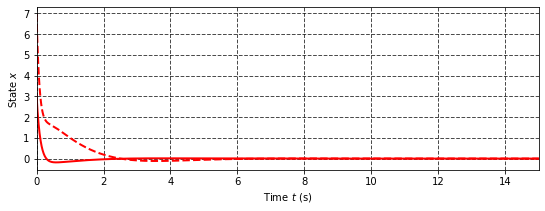

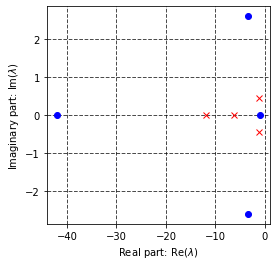

In [ ]:
import numpy as np
from scipy.signal import place_poles


Q = np.diag([1,1,1,1])
R = np.diag([1])

simulations = {'fast':{'R':R/10},'slow':{'R':R*5}}

for sim_type in simulations.keys():
  R = simulations[sim_type]['R']
  S, K, E = lqr(A, B, Q, R)
  simulations[sim_type]['eigs'] = E
  simulations[sim_type]['K'] = K
  simulations[sim_type]['x'] = odeint(system_ode, x0, t, args=(A, B, K ))
  simulations[sim_type]['u'] = - K.dot(x_sol.T).T
  

figure(figsize=(9, 3))
plot(t, simulations['slow']['x'][:,0], 'r', linewidth=2.0)
plot(t, simulations['slow']['x'][:,2], 'b', linewidth=2.0)
plot(t, simulations['fast']['x'][:,0], 'r--', linewidth=2.0)
plot(t, simulations['fast']['x'][:,2], 'b--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(9, 3))
plot(t, simulations['slow']['u'], 'r', linewidth=2.0)
plot(t, simulations['fast']['u'], 'r--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$ (s)')
show()

figure(figsize=(4, 4))
plot(simulations['fast']['eigs'].real, simulations['fast']['eigs'].imag, 'bo', label='Fast')
plot(simulations['slow']['eigs'].real, simulations['slow']['eigs'].imag, 'rx',
         label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()



Such analysis is usually performed used wider variety of approaches and mathematical tools including:
* Graphical methods such as **phase portraits** 
* Approximations of local behavior via **linearization**
* Geometrical methods and **nonlinear transformations**
* The "testing-functions" tools, such as **describing functions** and **Lyapunov method**

While the phase portraits are great visual tool that we can use for low dimensional systems 

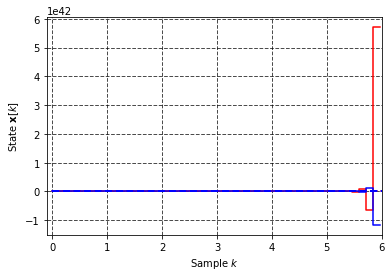

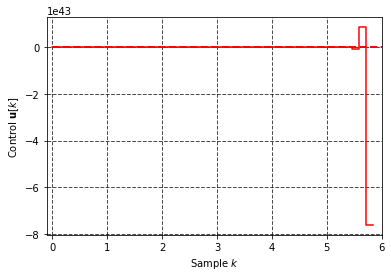

In [ ]:
from scipy.signal import cont2discrete as c2d
C = [1,0,0,0]
C = np.array(C)
D = np.array([[0]])

T = 0.13
tf = 6
N = int(tf/T)
A_d, B_d, C, D, _ = c2d((A,B,C,D), T)

K = simulations['fast']['K']
state_c = simulations['fast']['x']
u_c = simulations['fast']['u']
eigs_c = simulations['fast']['eigs']

x = np.array([0.2, 0, 0, 0])
X = x
U = []

for k in range(N):
  u = -np.dot(K,x)
  U.append(u)
  x = A_d.dot(x) + B_d.dot(u)
  X = np.vstack((X, x))



theta_c, dtheta_c, x_c, dx_c = state_c[:, 0], state_c[:, 1], state_c[:, 2], state_c[:, 3]
theta_d, dtheta_d, x_d, dx_d =X[:, 0], X[:, 1], X[:, 2], X[:, 3]

step(T*np.arange(N+1),theta_d, 'r')
step(T*np.arange(N+1),x_d, 'b')
plot(t, theta_c, 'r--', linewidth=2.0)
plot(t, x_c, 'b--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'State $\mathbf{x}[k]$')
xlabel(r'Sample $k$')
xlim([-0.1, tf])
show()

step(T*np.arange(N),U, 'r')
plot(t, u_c, 'r--', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([-0.1, tf])
ylabel(r'Control $\mathbf{u}[k]$')
xlabel(r'Sample $k$')
show()

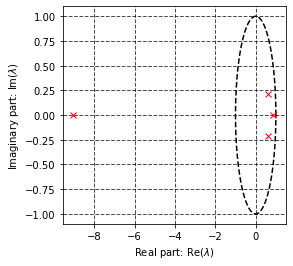

In [ ]:
eigs_d = np.linalg.eigvals(A_d - B_d.dot(K))

z = np.linspace(0, 2*np.pi, 500)

figure(figsize=(4, 4))
plot(np.cos(z), np.sin(z), 'k--')  # unit circle
# plot(eigs_c.real, eigs_c.imag, 'bo', label='Fast')
plot(eigs_d.real, eigs_d.imag, 'rx', label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()

### **Discrete Time LQR**
For a discrete-time linear system described by:

\begin{equation}
\mathbf{x}_{k+1}=\mathbf{A} \mathbf{x}_{k}+\mathbf{B}\mathbf{u}_{k}
\end{equation}
with a performance index defined as:
\begin{equation}
J_c=\sum \limits _{{k=0}}^{{\infty }}\left(\mathbf{x}_{k}^{T}\mathbf{Q}\mathbf{x}_{k}+\mathbf{u}_{k}^{T}\mathbf{R}\mathbf{u}_{k}\right)
\end{equation}

the optimal control sequence minimizing the performance index is given by:
\begin{equation}
\mathbf{u}_{k}=-\mathbf{K} \mathbf{x}_{k}
\end{equation}

where:
\begin{equation}
\mathbf{K}=(\mathbf{R}+\mathbf{B}^{T}\mathbf{S}\mathbf{B})^{{-1}}\mathbf{B}^{T}\mathbf{S}\mathbf{A}
\end{equation}

and $\mathbf{S}$ is the unique positive definite solution to the discrete time algebraic Riccati equation (DARE):

\begin{equation}
\mathbf{S}=\mathbf{A}^{T}\mathbf{S}\mathbf{A}-(\mathbf{A}^{T}\mathbf{S}\mathbf{B})\left(\mathbf{R}+\mathbf{B}^{T}\mathbf{S}\mathbf{B}\right)^{{-1}}(\mathbf{B}^{T}\mathbf{S}\mathbf{A})+\mathbf{Q}
\end{equation}

>**HW EXERCISE**: 
Implement the Discrete Time LQR



* Where to get physicaly feasible trajectory?


* LQR
  * Definition
  * LTI, LTV
  * Descrete version
  * Connection with Lyapunov Theory
  
Linear Control over Nonlinear Systems
  * Closed Loop response
  * ROA via Lyapunov and Sampling


### **Nominal Motion and Linearization Around Trajectory**
In some practical problems, we are not concerned with stability around an equilibrium
point, but rather with the stability of a motion, i.e, whether a system will remain close
to its original motion trajectory if slightly perturbed away from it. 

Let $\mathbf{x}_d(t)$ be the solution of equation $\dot{\mathbf{x}}_d = \mathbf{f}(\mathbf{x}_d)$, i.e., the nominal motion trajectory,
corresponding to initial condition $\mathbf{x}_d(0) = \mathbf{x}_0$. 

Let us now perturb the initial condition to be $\mathbf{x}_d(0) = \mathbf{x}_0 + \delta\mathbf{x}_0$ and study the associated variation of the motion:
\begin{equation*}
\tilde{\mathbf{x}}(t) = \mathbf{x}(t) - \mathbf{x}_d(t)
\end{equation*}


Since both $\mathbf{x}_d(t)$ and $\mathbf{x}(t)$ are solutions, we have the following:
\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{f}(\mathbf{x}_d(t)+\tilde{\mathbf{x}}) - \mathbf{f}(\mathbf{x}_d(t)) = \mathbf{g}(\tilde{\mathbf{x}}, t)
\end{equation*}
with initial condition $\tilde{\mathbf{x}}_0 = \delta\mathbf{x}_0$

Note, that the perturbation dynamics is non-autonomous (TV), due to the presence of the nominal trajectory $\mathbf{x}_d(t)$ on the right-hand side. 
Thus the linearization will be time variant

### **Control Design Based on Lyapunov's Direct Method**

Previously we have used Lyapunov's direct method for system analysis. In doing the analysis, we have implicitly presumed that certain control laws have been chosen for the systems. 

However, in many control problems, the **actual task** is to find an **appropriate control law** for a given plant. In the following, we briefly discuss how to apply Lyapunov's direct method for designing stable control
systems. 

Most of the controller design methods we will describe in later classes are actually based on Lyapunov concepts.

There are basically two ways of using Lyapunov's direct method for control design, and both have a trial and error flavor:

* The first technique involves **hypothesizing one form of control law** and then finding a Lyapunov function to justify the choice. 
* The second technique, conversely, requires **hypothesizing a Lyapunov
function** candidate and then finding a control law to make this candidate a real
Lyapunov function.